# Goal 
### In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

### Column names and description

1. Gender -- Whether the customer is a male or a female
2. SeniorCitizen -- Whether a customer is a senior citizen or not
3. Partner -- Whether the customer has a partner or not (Yes, No)
4. Dependents -- Whether the customer has dependents or not (Yes, No)
5. Tenure -- Number of months the customer has stayed with the company
6. Phone Service -- Whether the customer has a phone service or not (Yes, No)
7. MultipleLines -- Whether the customer has multiple lines or not
8. InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)
9. OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)
10. OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)
11. DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)
12. TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)
13. StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)
14. StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)
15. Contract -- The contract term of the customer (Month-to-Month, One year, Two year)
16. PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)
17. Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
18. MonthlyCharges -- The amount charged to the customer monthly
19. TotalCharges -- The total amount charged to the customer
20. Churn -- Whether the customer churned or not (Yes or No)

#### Questions Asked.
1. What is the number of male and female customers.?
2. What is the proportion on male and females who have dependants.?
3. Which internet service customers churn the most?
4. Which type of payment method is used the most?
5. Which payment method churn more?
6. Which customers churn more in terms of internet service?
7. Which type of billing (paperless/paper) churn the most?
8. Which contract type churn the most?


#### Hypothesis.
1. Loyal customers churn the most
2. Females are more likely to churn out than men.
3. Customers with paper billings are more likely to churn out more.
4. Customers with no Tech Support churn the most.
5. Increased charges results in customer churn.
6. Month-to-Month contract holders churn the most.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import waterfall_chart
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

# Importing libraries for Modeling
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
import plotly.express as px

In [2]:
# Loading the dataset
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# Exploring the dataset
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Checking for Min and Max values in the 'tenure' column
data['tenure'].min(), data['tenure'].max()

(0, 72)

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Replacing empty cells with 'null values'
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan)

In [9]:
# Converting the data type of the 'TotalCharges' column to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Dropping all null value
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [11]:
# Viewing all columns of the data set
pd.set_option('display.max_columns', None)
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  
0              29.85         29.85    No  
1              56.95       1889.50    No  
2              53.85        108.15   Yes  
3              42.30       1840.75    No  
4              70.70        151.65   Yes  
...              ...           ...   ...  
7038           84.80       1990.50    No  
7039          103.20       7362.90    No  
7040           29.60        346.45    No  
7041           74.40        306.60   Yes  
7042          105.65       6844.50    No  

[7032 rows x 21 columns]

##### Checking unique values in some columns

In [12]:
for column in data:
    if data[column].dtypes == 'object':
     print (f'{column}:{data[column].unique()}')

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [13]:
# Checking unique values in the Payment method column
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
# Checking unique values in the Multiple Lines column
data.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [15]:
# Checking for unique values in the 'Total Charges' column
data.TotalCharges.isnull().sum()

0

In [16]:
# Checking the shape of the dataset
data.shape

(7032, 21)

In [17]:
# Converting the data type of 'MonthlyCharges' from 'object' to 'float'.
# data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce').fillna(0, downcast = 'infer')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [19]:
data.drop(data[data['TotalCharges'] == 0].index,
         inplace = True)

In [20]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [21]:
# Checking the correlation of the dataset
data.corr()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000

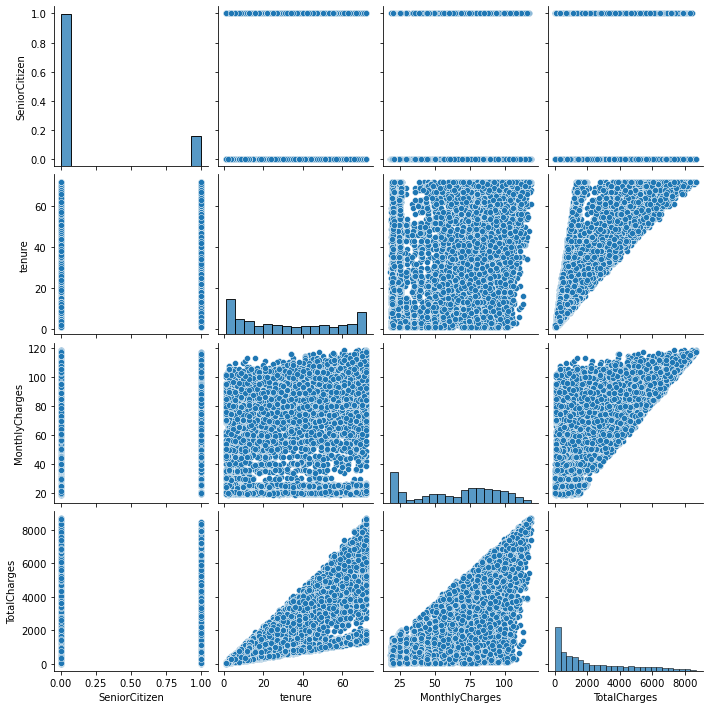

In [22]:
# Visualizing a pair plot of all numeric columns
sns.pairplot(data)

<AxesSubplot:>

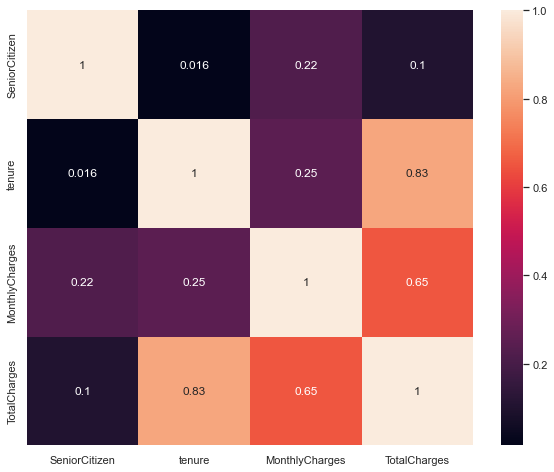

In [23]:
# Checking for correlation in the data set.
sns.set(rc = {'figure.figsize': (10,8)})
sns.heatmap(data.corr(),annot = True)

## Answering questions asked

### Q1. What is the number of male and female customers.?

In [24]:
gender_propotion = pd.DataFrame(data.gender.value_counts())
gender_propotion

gender
Male      3549
Female    3483

### Q2 What is the proportion on male and females who have dependents.?

In [25]:
gender_dependents = pd.DataFrame(data.groupby('gender').aggregate({'Dependents':'value_counts'}))
gender_dependents

Dependents
gender Dependents            
Female No                2460
       Yes               1023
Male   No                2473
       Yes               1076

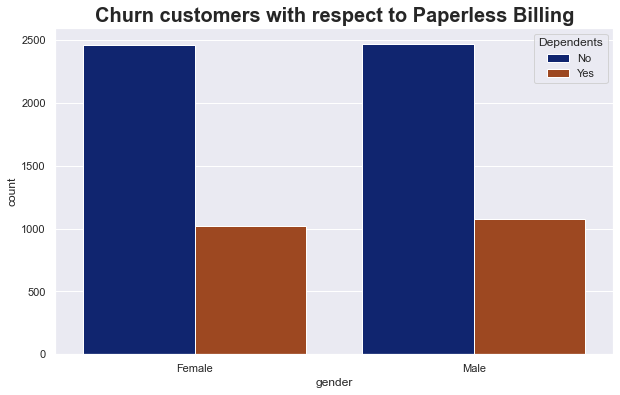

In [26]:
# Plotting the results
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'gender', hue = 'Dependents', palette = 'dark')
plt.title('Churn customers with respect to Paperless Billing', fontsize = 20, fontweight = 'bold')
plt.savefig('gender_dependents.png', dpi = 300)
plt.show()

### Q3. Which internet service has the most number of customers?

In [27]:
InternetService = pd.DataFrame(data.InternetService.value_counts())
                            
# InternetService_churn = pd.DataFrame(data.groupby('InternetService').aggregate({'Churn':'value_counts'}, index = True))
InternetService


InternetService
Fiber optic             3096
DSL                     2416
No                      1520

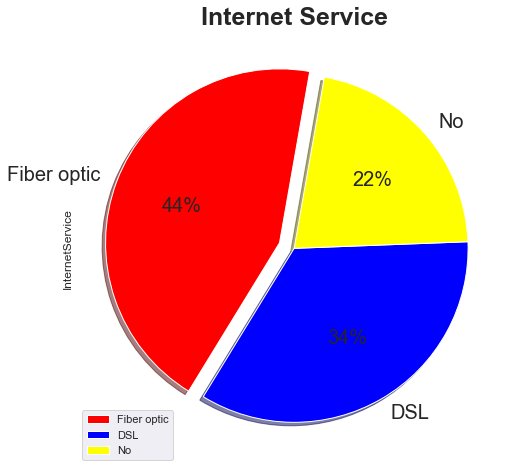

In [28]:
# Defining the colours for the chart 
colors = ['red', 'blue', 'yellow']

# Define the ratio of gap of each fragment in a tuple
explode = (0.09, 0, 0)

# Plotting the chart
InternetService.plot(
    kind='pie', y = 'InternetService',
    autopct='%1.0f%%', 
    explode=explode,
    shadow = True,
    startangle = 80,
    fontsize = 20,
    colors=colors,)

plt.title('Internet Service', fontsize = 25, fontweight = 'bold')
plt.savefig('InternetService.png', dpi = 300)

### Q4. Which type of payment methon is used the most?

In [29]:
paymentmethod = pd.DataFrame(data.PaymentMethod.value_counts())
paymentmethod

PaymentMethod
Electronic check                    2365
Mailed check                        1604
Bank transfer (automatic)           1542
Credit card (automatic)             1521

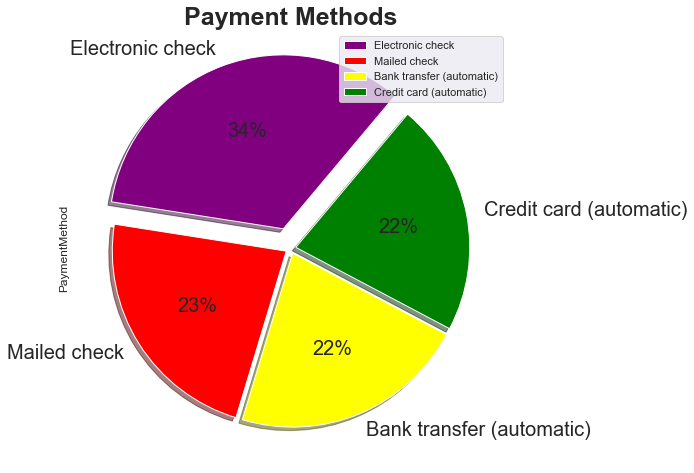

In [30]:
# Defining the colours for the chart 
colors = ['purple', 'red', 'yellow','green']

# Define the ratio of gap of each fragment in a tuple
explode = (0.12, 0.03, 0.03, 0.03)

# Plotting the chart
paymentmethod.plot(
    kind='pie', y = 'PaymentMethod',
    autopct='%1.0f%%', 
    explode=explode,
    shadow = True,
    startangle = 50,
    fontsize = 20,
    colors=colors,)

plt.title('Payment Methods', fontsize = 25, fontweight = 'bold',)
plt.savefig('PaymentMethod.png', dpi = 300)

### Q.5 Which Payment Method churn more?

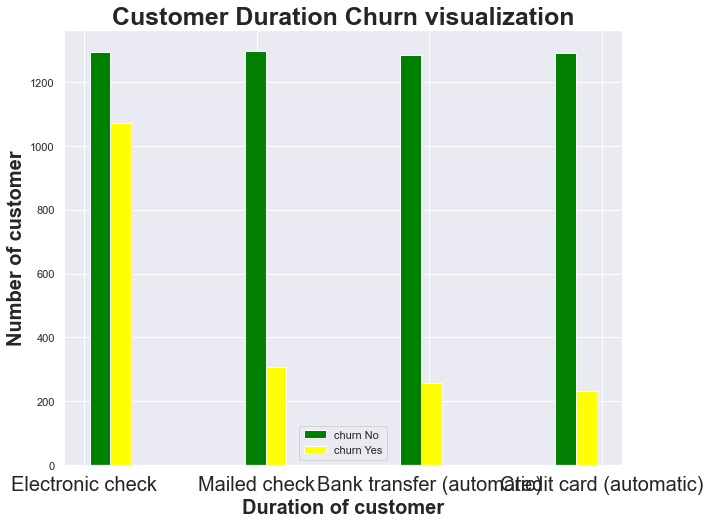

In [31]:
loyal_churn_No = data[data.Churn == 'No'].PaymentMethod
loyal_churn_Yes = data[data.Churn == 'Yes'].PaymentMethod

plt.xlabel('Duration of customer', fontsize = 20, fontweight = 'bold')
plt.ylabel('Number of customer', fontsize = 20, fontweight = 'bold') 
plt.title('Customer Duration Churn visualization', fontsize = 25, fontweight = 'bold')
plt.rcParams["figure.figsize"] = (15,10)
plt.xticks(fontsize = 20)
plt.hist([loyal_churn_No, loyal_churn_Yes], color = ['green', 'yellow'], label = ["churn No", 'churn Yes'] )
plt.savefig('payment_churn.png', dpi = 300)
plt.legend()

#### Comment
From the chart it can be seen that although most customers use the electronic check method they also churn more compared to the rest of the payment method

### Q6 Which customers churn more in terms of type of internet services

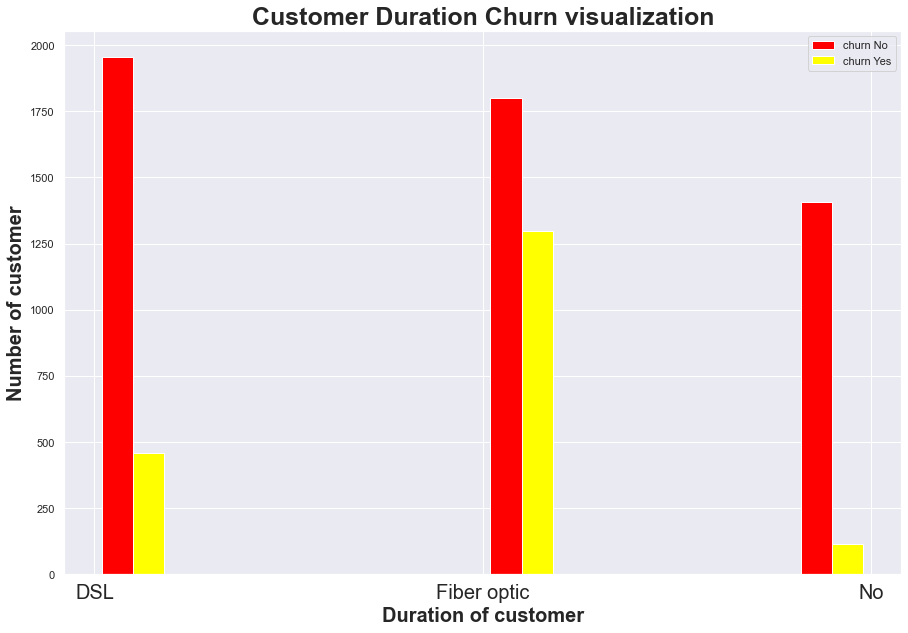

In [32]:
loyal_churn_No = data[data.Churn == 'No'].InternetService
loyal_churn_Yes = data[data.Churn == 'Yes'].InternetService

plt.xlabel('Duration of customer', fontsize = 20, fontweight = 'bold')
plt.ylabel('Number of customer', fontsize = 20, fontweight = 'bold') 
plt.title('Customer Duration Churn visualization', fontsize = 25, fontweight = 'bold')
plt.rcParams["figure.figsize"] = (15,10)
plt.xticks(fontsize = 20)
plt.hist([loyal_churn_No, loyal_churn_Yes], color = ['red', 'yellow'], label = ["churn No", 'churn Yes'] )
plt.savefig('internetService_churn.png', dpi = 300)
plt.legend()

#### Further investigation on why fiber optics customers churn the most .

Text(0.5, 1.0, 'Internet Service Per Streaming Movies')

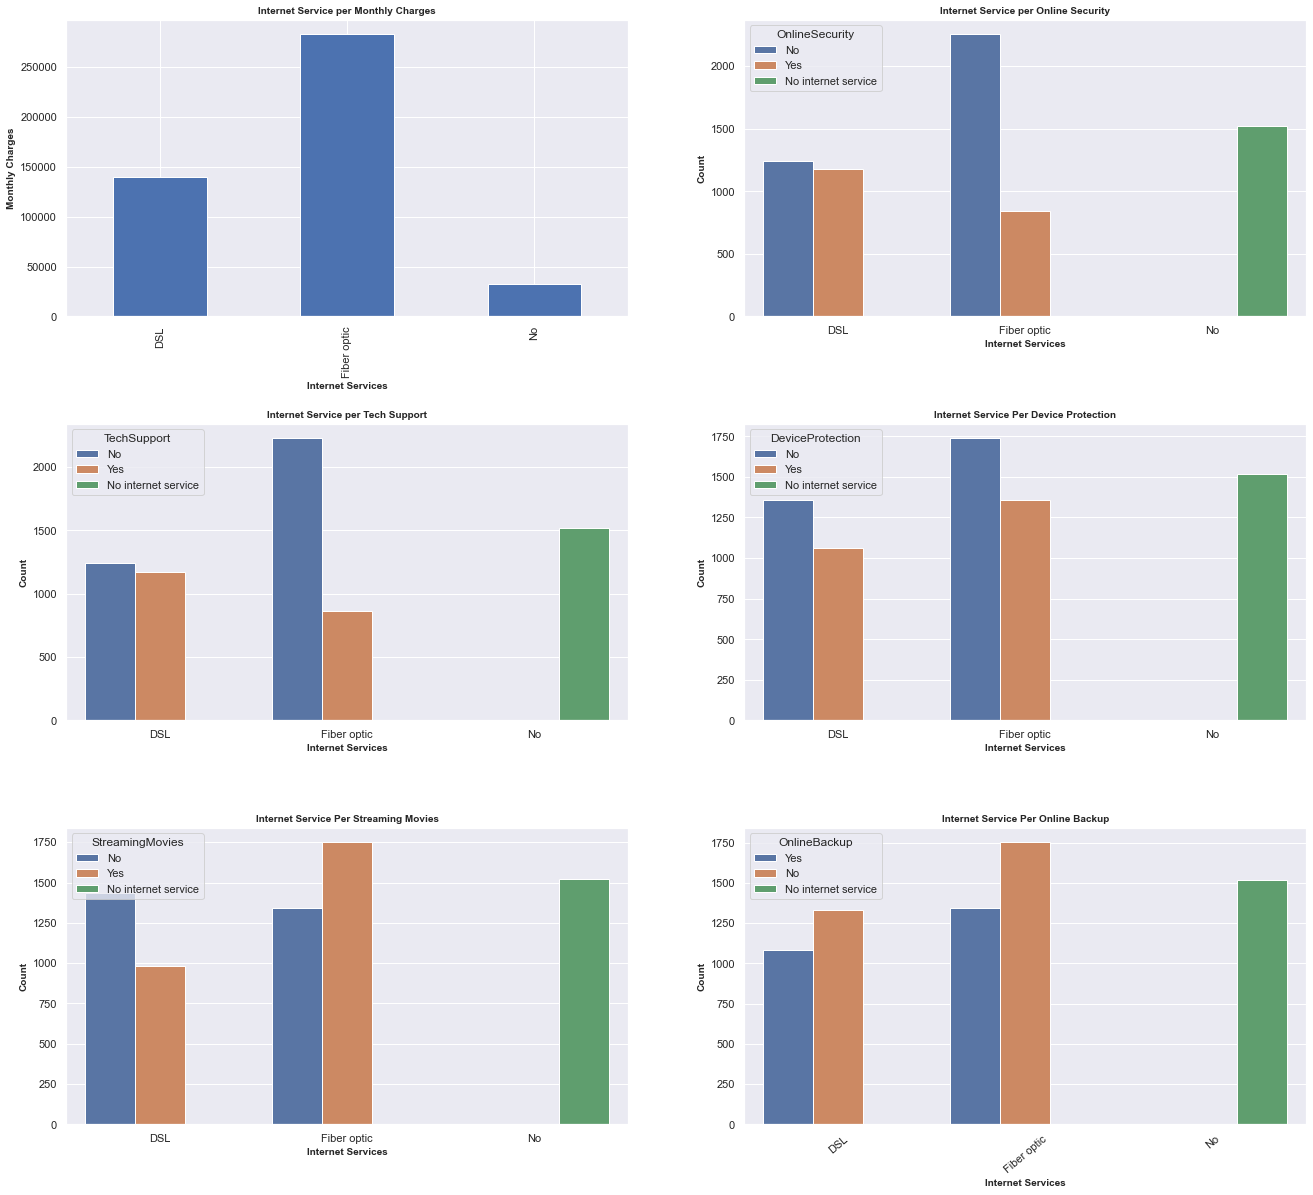

In [33]:
# Defining the Visualization parameters.
fig, axes = plt.subplots(3,2, figsize=(20,18))
fig.tight_layout(pad = 7.0)
plt.xticks(rotation = 40, horizontalalignment="center")
sns.color_palette("bright")
plt.savefig('internetService_churn_investigation.png', dpi = 300)

# Visualizing the relationship between types of Internet Service and Monthly Charges
InternetService_charges = data.groupby(['InternetService'])['MonthlyCharges'].sum().plot(kind = 'bar', x = 'InternetService',y = 'MonthlyCharges', ax = axes[0,0])
InternetService_charges.set_title('Internet Service per Monthly Charges', fontsize = 10, fontweight = 'bold')
InternetService_charges.set_xlabel('Internet Services', fontsize = 10, fontweight ='bold') 
InternetService_charges.set_ylabel('Monthly Charges', fontsize = 10, fontweight = 'bold')

# Visualizing the relationship between types of Internet Service and Online Security
InternetService_Security = sns.countplot(data = data, x = "InternetService", hue = "OnlineSecurity", ax = axes[0,1])
InternetService_Security.set_title('Internet Service per Online Security', fontsize = 10, fontweight = 'bold')
InternetService_Security.set_xlabel('Internet Services', fontsize = 10, fontweight = 'bold')
InternetService_Security.set_ylabel('Count', fontsize = 10, fontweight = 'bold')

# Visualizing the relationship between types of Internet Service and Tech Support
InternetService_Support = sns.countplot(data = data, x = "InternetService", hue = "TechSupport", ax = axes[1,0])
InternetService_Support.set_title('Internet Service per Tech Support', fontsize = 10, fontweight = 'bold')
InternetService_Support.set_xlabel('Internet Services', fontsize = 10, fontweight = 'bold')
InternetService_Support.set_ylabel('Count', fontsize = 10, fontweight = 'bold')

# Visualizing the relationship between types of Internet Service and Device Protection
InternetService_Protection = sns.countplot(data = data,x= "InternetService", hue="DeviceProtection", ax=axes [1,1])
InternetService_Protection.set_xlabel('Internet Services', fontsize=10, fontweight = 'bold') 
InternetService_Protection.set_ylabel('Count', fontsize = 10, fontweight = 'bold')
InternetService_Protection.set_title('Internet Service Per Device Protection', fontsize=10, fontweight='bold')

# Visualizing the relationship between types of Internet Service and Online Backup
InternetService_Backup = sns.countplot(data = data,x = "InternetService", hue = "OnlineBackup", ax = axes [2,1])
InternetService_Backup.set_xlabel('Internet Services', fontsize=10, fontweight = 'bold') 
InternetService_Backup.set_ylabel('Count', fontsize = 10, fontweight = 'bold')
InternetService_Backup.set_title('Internet Service Per Online Backup', fontsize = 10, fontweight = 'bold')

# Visualizing the relationship between types of Internet Service and Streaming of Movies
InternetService_Streaming = sns.countplot(data = data,x = "InternetService", hue = "StreamingMovies", ax = axes [2,0])
InternetService_Streaming.set_xlabel('Internet Services', fontsize = 10, fontweight = 'bold') 
InternetService_Streaming.set_ylabel('Count', fontsize = 10, fontweight = 'bold')
InternetService_Streaming.set_title('Internet Service Per Streaming Movies', fontsize = 10, fontweight = 'bold')



#### Comment
From the chart above it can be observed that fibre obtics has the highest monthly charges compered to the internet types whict is DSL. It can also be seen that a good number of fibre obtics customers has no online security support. Again it can also be seen that majority of fibre obtics customers has no Device protection. Majority of the fibre obtics customers also do not movie streaming capabilities. Online backup is also not available for most fibre optic customers. 

These factors maybe the reason why fibre optics customers chrun the most than other customers using DSL.

### Q7. what is the number of customers with and without paperless billing?

In [34]:
PaperlessBilling = pd.DataFrame(data.PaperlessBilling.value_counts())
PaperlessBilling

PaperlessBilling
Yes              4168
No               2864

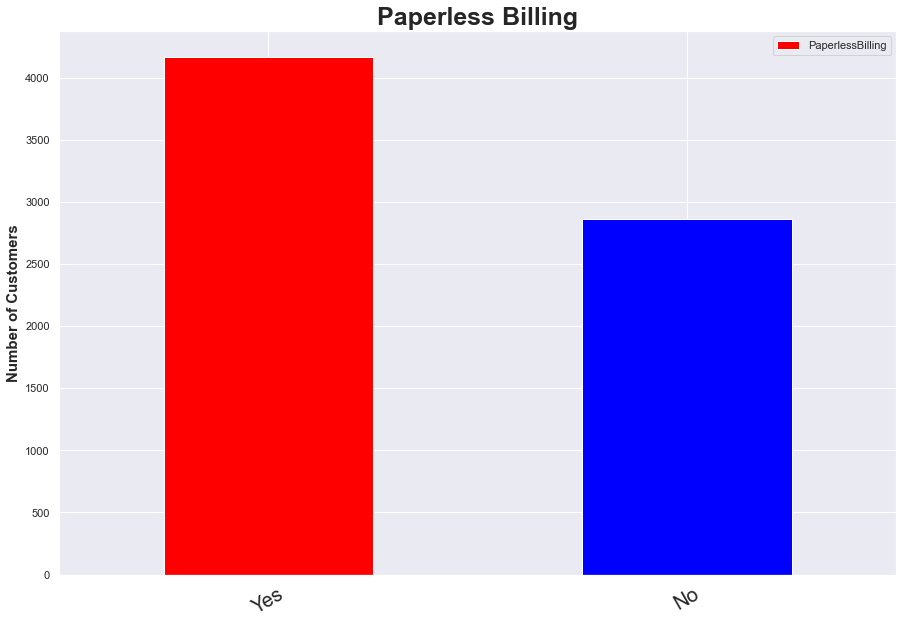

<Figure size 1080x576 with 0 Axes>

In [35]:

# Plotting the chart
PaperlessBilling.plot(kind='bar', y = 'PaperlessBilling', color=['red', 'blue'])
fontsize = 20
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Paperless Billing", fontsize = 25, fontweight = 'bold')
plt.ylabel("Number of Customers", fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 20)
plt.figure(figsize = (15,8))
plt.savefig('PaperlessBilling.png', dpi = 300)

### Q8. Which contract type churn the most?

In [36]:
data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [37]:
ContractTypes = pd.DataFrame(data.Contract.value_counts())
ContractTypes

Contract
Month-to-month      3875
Two year            1685
One year            1472

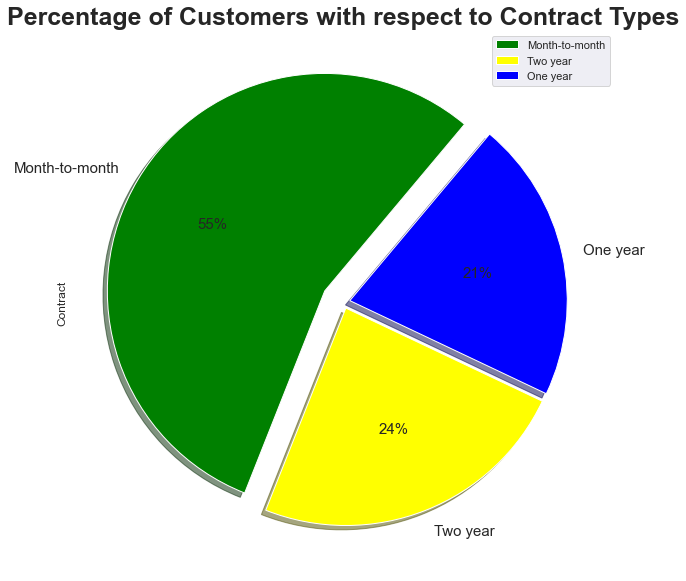

In [38]:
# Defining the colours for the chart 
colors = ['green', 'yellow','blue']

# Define the ratio of gap of each fragment in a tuple
explode = (0.1, 0.03, 0.03)

# Plotting the chart
ContractTypes.plot(
    kind='pie', y = 'Contract', 
    autopct='%1.0f%%', 
    explode=explode,
    shadow = True,
    startangle = 50,
    fontsize = 15,
    colors=colors)

plt.title('Percentage of Customers with respect to Contract Types', fontsize = 25, fontweight = 'bold',)
plt.savefig('Contract Types.png', dpi = 300)

#### Comment
From the chart above it can be seen that most customers are subscribed to 'Month-to-month' contracts which is 55% of the entire customers, followed by Two years contract with 24% and one year contract with 21%. 

## ANSWERING THE HYPOTHESIS STATEMENT

### 1.  Customers that have been with the company for a long time churn the most.

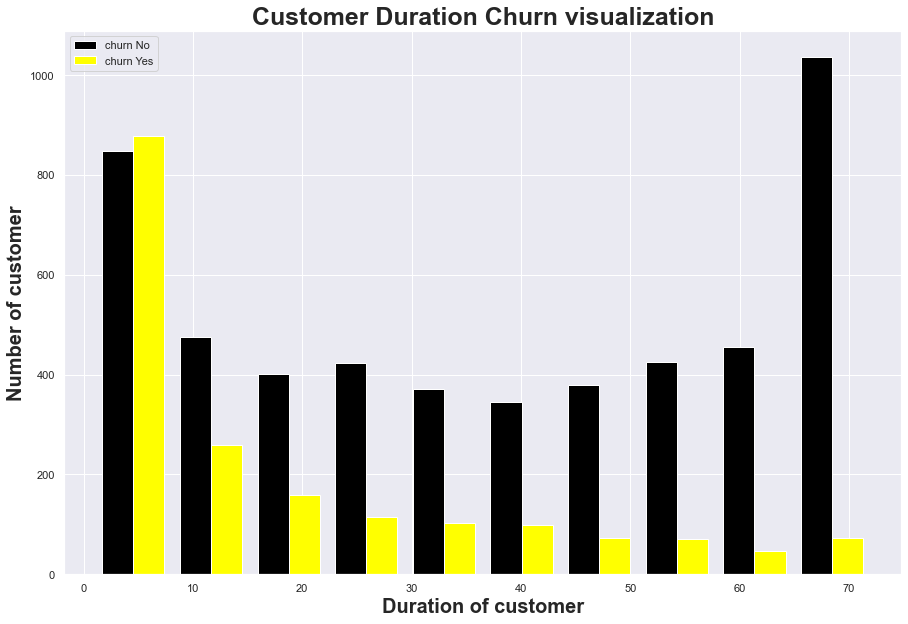

In [39]:
loyal_churn_No = data[data.Churn == 'No'].tenure
loyal_churn_Yes = data[data.Churn == 'Yes'].tenure

plt.xlabel('Duration of customer', fontsize = 20, fontweight = 'bold')
plt.ylabel('Number of customer', fontsize = 20, fontweight = 'bold') 
plt.title('Customer Duration Churn visualization', fontsize = 25, fontweight = 'bold')
plt.rcParams["figure.figsize"] = (15,10)
plt.hist([loyal_churn_No, loyal_churn_Yes], color = ['black', 'yellow'], label=["churn No", 'churn Yes'] )
plt.savefig('loyal_churn.png', dpi = 300)
plt.legend()

#### Comment

From the above chart it can be seen that loyal customers ( thus customers that have stayed longer with the company ) churn out less than new customers. This suggest that new customers are more likely to churn.

###  2. Females are more likely to churn out than men.

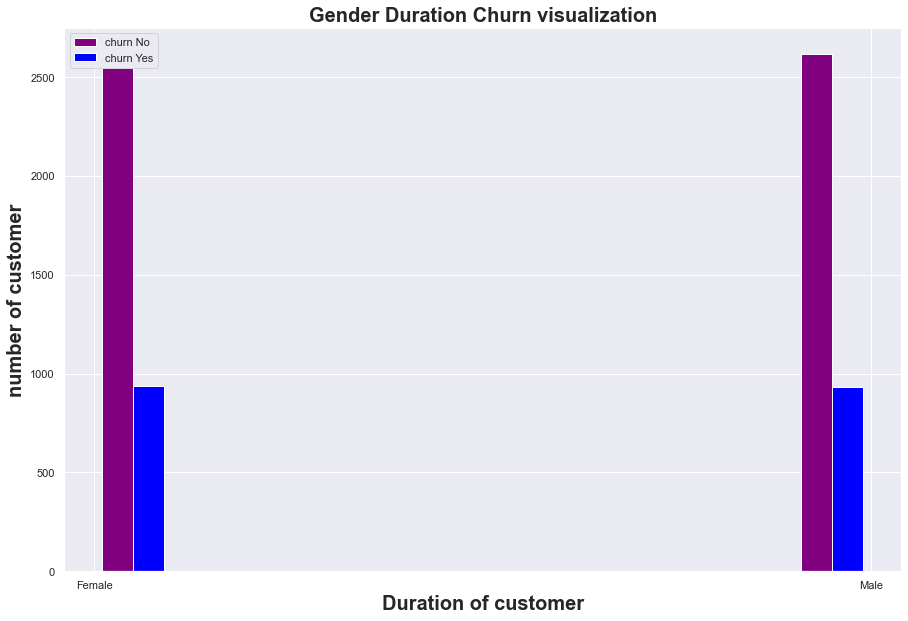

In [42]:
loyal_churn_No = data[data.Churn == 'No'].gender
loyal_churn_Yes = data[data.Churn == 'Yes'].gender

plt.xlabel('Duration of customer', fontsize = 20, fontweight = 'bold')
plt.ylabel('number of customer', fontsize = 20, fontweight = 'bold') 
plt.title('Gender Duration Churn visualization', fontsize = 20, fontweight = 'bold')
plt.rcParams["figure.figsize"] = (15,10)
plt.hist([loyal_churn_No, loyal_churn_Yes], color = ['purple', 'blue'], label = ["churn No", 'churn Yes'] )
plt.savefig('female Churn.png', dpi = 300)
plt.legend()


#### Comment
From the chart above, female churn slightly more than males.

### 3. Customers with papar billings are more likely to churn out more.

In [43]:
# Grouping the data by paperless billing and customer churn
data.groupby('PaperlessBilling').aggregate({'Churn':'value_counts'})

Churn
PaperlessBilling Churn       
No               No      2395
                 Yes      469
Yes              No      2768
                 Yes     1400

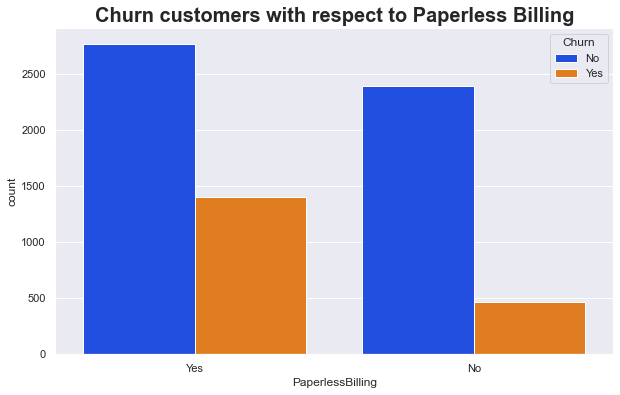

In [44]:
# Plotting the results
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'PaperlessBilling', hue = 'Churn', palette = 'bright')
plt.title('Churn customers with respect to Paperless Billing', fontsize = 20, fontweight = 'bold')
plt.show()

#### Comment

From the above chart it can be seen that the customers with paperless billing churn the more than customers without paperless billing. The business should take a critical look at their paperless billing and fix any issues if any, this will help reduce customer churn in terms of billing challenges

### 4. Customers with no Tech Support churn the most.

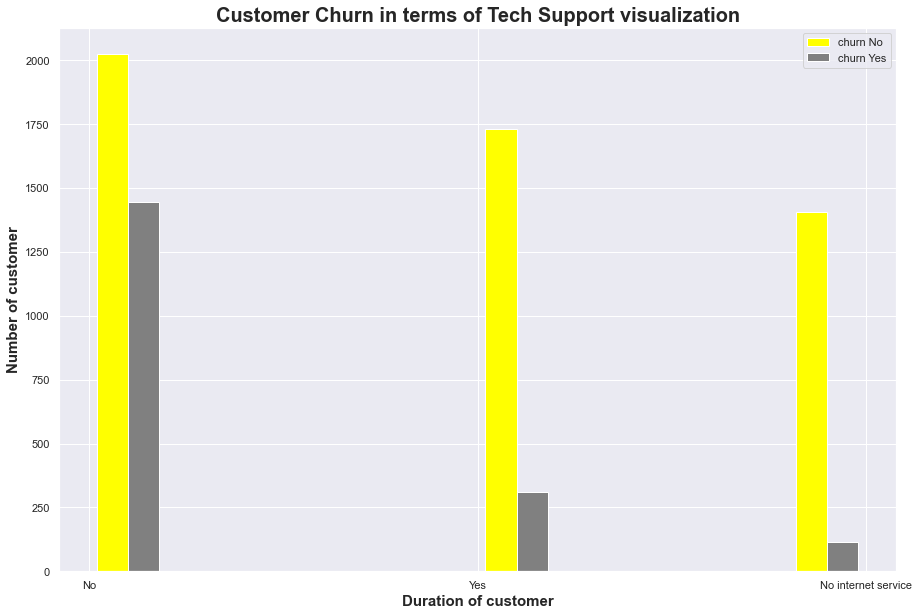

In [45]:
loyal_churn_No = data[data.Churn == 'No'].TechSupport
loyal_churn_Yes = data[data.Churn == 'Yes'].TechSupport

plt.xlabel('Duration of customer', fontsize = 15, fontweight = 'bold')
plt.ylabel('Number of customer', fontsize = 15, fontweight = 'bold') 
plt.title('Customer Churn in terms of Tech Support visualization', fontsize = 20, fontweight = 'bold')
plt.rcParams["figure.figsize"] = (15,10)
plt.hist([loyal_churn_No, loyal_churn_Yes], color = ['Yellow', 'gray'], label=["churn No", 'churn Yes'] )
plt.savefig('Tech Support Churn.png', dpi = 300)
plt.legend()

#### Comment
From the above chart it can be seen that customers with no Tech support churn the most then customers with Tech support. A suggestion to fix this issue is to make sure Tech support is extended to all customers 

### 5. Increased charges result in customer churn.

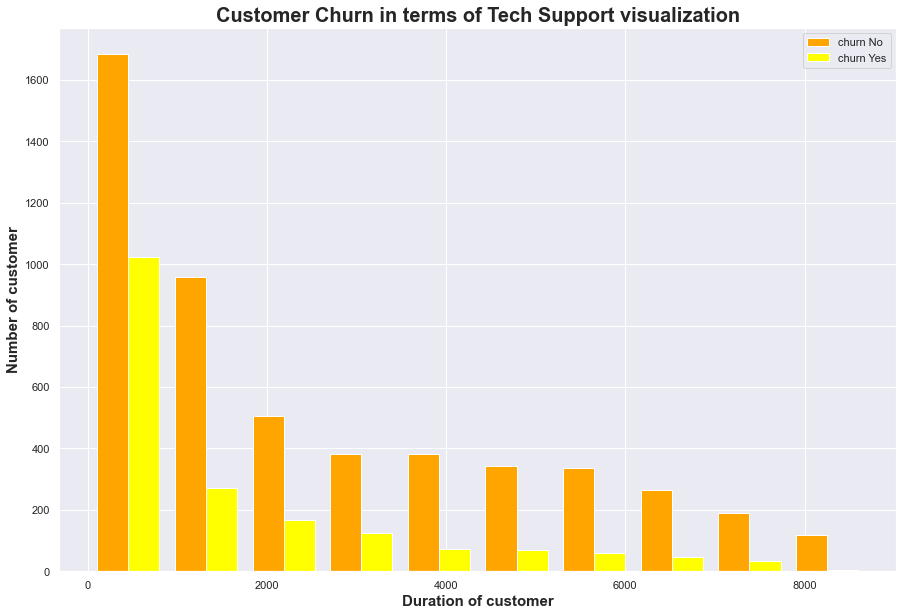

In [46]:
loyal_churn_No = data[data.Churn == 'No'].TotalCharges
loyal_churn_Yes = data[data.Churn == 'Yes'].TotalCharges

plt.xlabel('Duration of customer', fontsize = 15, fontweight = 'bold')
plt.ylabel('Number of customer', fontsize = 15, fontweight = 'bold') 
plt.title('Customer Churn in terms of Tech Support visualization', fontsize = 20, fontweight = 'bold')
plt.rcParams["figure.figsize"] = (15,10)
plt.hist([loyal_churn_No, loyal_churn_Yes], color = ['orange', 'yellow'], label=["churn No", 'churn Yes'] )
plt.savefig('Charged Churn.png', dpi = 300)
plt.legend()

#### Comment
Surprisingly, from the above chart, High charges does not translate into high customer churn. Most customers churning out of the business pay low charges, It can also be seen that majority of the company's customers belong to the group that pay low charges. With this out come it calls for more investigation on why low-paying customers churn the most.

### 6. Month-to-Month contract holders churn the most

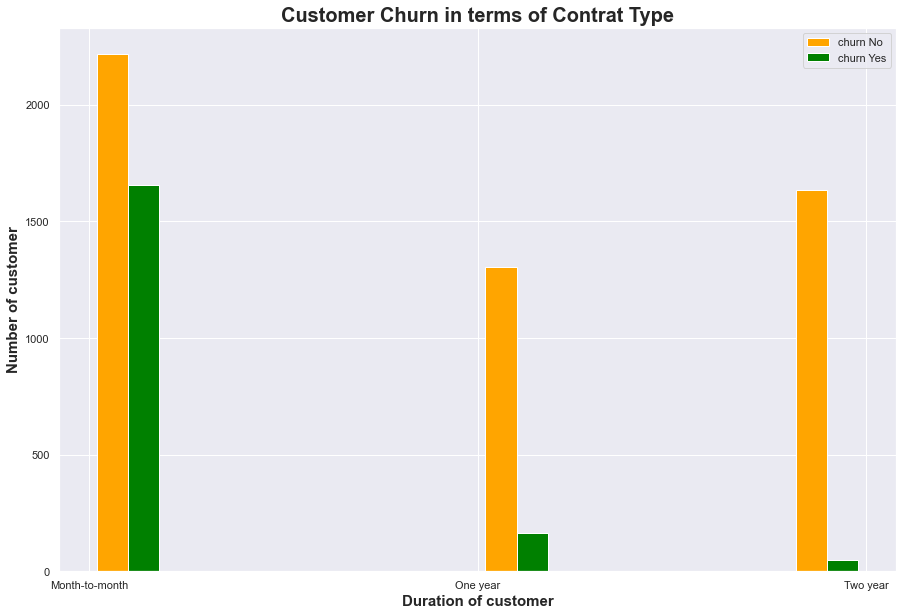

In [47]:
loyal_churn_No = data[data.Churn == 'No'].Contract
loyal_churn_Yes = data[data.Churn == 'Yes'].Contract

plt.xlabel('Duration of customer', fontsize = 15, fontweight = 'bold')
plt.ylabel('Number of customer', fontsize = 15, fontweight = 'bold') 
plt.title('Customer Churn in terms of Contrat Type', fontsize = 20, fontweight = 'bold')
plt.rcParams["figure.figsize"] = (15,10)
plt.hist([loyal_churn_No, loyal_churn_Yes], color = ['orange', 'green'], label=["churn No", 'churn Yes'] )
plt.savefig('Contract Churn.png', dpi = 300)
plt.legend()

#### Comment
From the above chart it can be seen that customers that subscribe to "Month-to-Month" contracts churn the most followed by "one-year" contract holders and lastly "two-year" contract holders churn the least.

#### Making further investigation on why Month-to-Month contract customers churn the most. 

Text(0.5, 1.0, 'Contract per Streaming Movies')

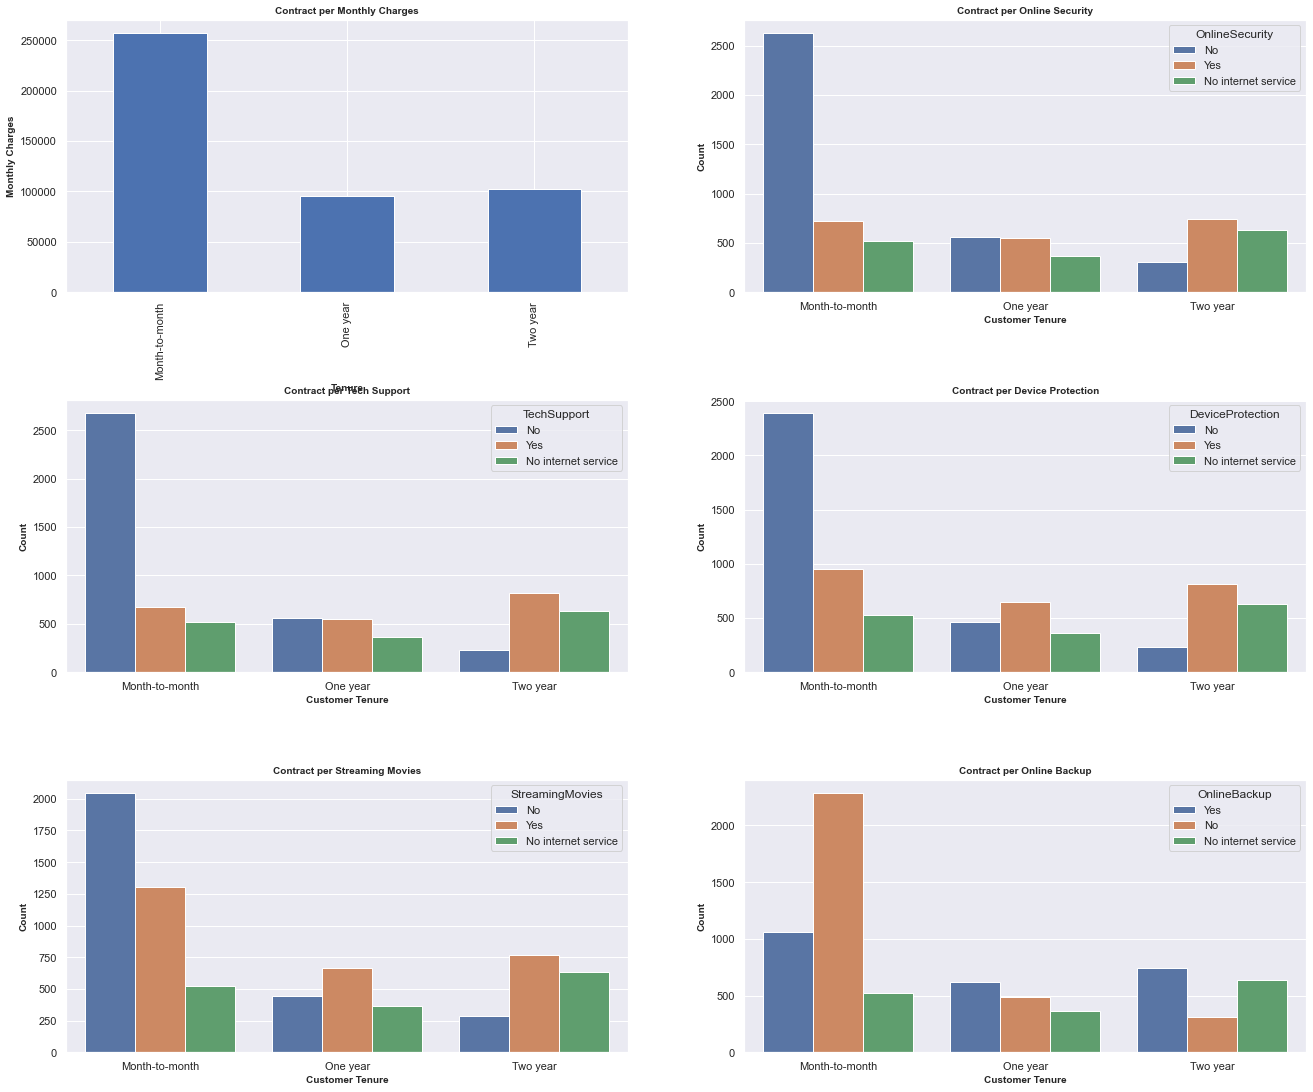

In [48]:
# Defining the Visualization parameters.
fig, axes = plt.subplots(3,2, figsize=(20,17))
fig.tight_layout(pad = 7.0)
plt.rcParams["figure.figsize"] = (20,18)
plt.savefig('Contract Churn investigation.png', dpi = 300)

# Visualizing the relationship between Customer Tenure and Monthly Charges
Contract_Charges = data.groupby(['Contract'])['MonthlyCharges'].sum().plot(kind = 'bar', x = 'tenure', y = 'MonthlyCharges', ax = axes[0,0])
Contract_Charges.set_title('Contract per Monthly Charges', fontsize = 10, fontweight = 'bold')
Contract_Charges.set_xlabel('Tenure', fontsize = 10, fontweight ='bold') 
Contract_Charges.set_ylabel('Monthly Charges', fontsize = 10, fontweight = 'bold')

# Visualizing the relationship between Customer Tenure and Online Security
Tenure_Security = sns.countplot(data = data, x = "Contract", hue = "OnlineSecurity", ax = axes[0,1])
Tenure_Security.set_title('Contract per Online Security', fontsize = 10, fontweight = 'bold')
Tenure_Security.set_xlabel('Customer Tenure', fontsize = 10, fontweight = 'bold')
Tenure_Security.set_ylabel('Count', fontsize = 10, fontweight = 'bold')

# Visualizing the relationship between Customer Tenure and Tech Support
Tenure_Support = sns.countplot(data = data, x = "Contract", hue = "TechSupport", ax = axes[1,0])
Tenure_Support.set_title('Contract per Tech Support', fontsize = 10, fontweight = 'bold')
Tenure_Support.set_xlabel('Customer Tenure', fontsize = 10, fontweight = 'bold')
Tenure_Support.set_ylabel('Count', fontsize = 10, fontweight = 'bold')

# Visualizing the relationship between Customer Tenure and Customer Tenure
Tenure_Protection = sns.countplot(data = data, x = "Contract", hue="DeviceProtection", ax=axes [1,1])
Tenure_Protection.set_xlabel('Customer Tenure', fontsize=10, fontweight = 'bold') 
Tenure_Protection.set_ylabel('Count', fontsize = 10, fontweight = 'bold')
Tenure_Protection.set_title('Contract per Device Protection', fontsize=10, fontweight='bold')

# Visualizing the relationship between Customer Tenure and Online Backup
Tenure_Backup = sns.countplot(data = data, x = "Contract", hue = "OnlineBackup", ax = axes [2,1])
Tenure_Backup.set_xlabel('Customer Tenure', fontsize=10, fontweight = 'bold') 
Tenure_Backup.set_ylabel('Count', fontsize = 10, fontweight = 'bold')
Tenure_Backup.set_title('Contract per Online Backup', fontsize = 10, fontweight = 'bold')

# Visualizing the relationship between Customer Tenure and Streaming of Movies
Tenure_Streaming = sns.countplot(data = data, x = "Contract", hue = "StreamingMovies", ax = axes [2,0])
Tenure_Streaming.set_xlabel('Customer Tenure', fontsize = 10, fontweight = 'bold') 
Tenure_Streaming.set_ylabel('Count', fontsize = 10, fontweight = 'bold')
Tenure_Streaming.set_title('Contract per Streaming Movies', fontsize = 10, fontweight = 'bold')

#### Comment
From the chart it can be seen that Month-to-Month contract holders has the highest monthly charges compared to other contract holders. Most of Month-to-Month contract customers also have no Online security. Again majority of Month-to-Month contract customers have no Tech support, Device protection and no movie streaming capabilities.

These factors may be the reasons why Month-to-Month customers churn the most compared other contract holders such are one year and two years contract. The company should fix some of this things in other to reduce Month-to-Month contract customers churn.

##  PREPARING THE DATA FOR MODELING

### Checking for class Imbalance data

<AxesSubplot:xlabel='Churn', ylabel='count'>

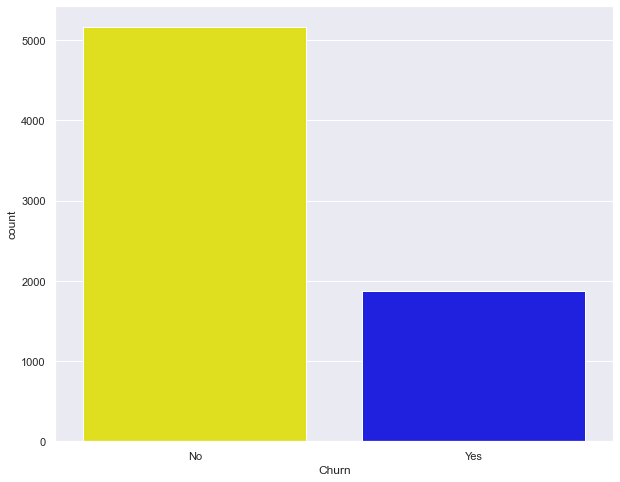

In [49]:
plt.figure(figsize = (10,8))
colors = ['yellow', 'blue']
lebels = ['Yes', 'No']
sns.set_palette(sns.color_palette(colors))
sns.countplot(data.Churn)

### ENCODING

In [50]:
# Importing needed libraries
from sklearn.preprocessing import LabelEncoder

In [51]:
# Viewing unique values of all the columns in the data set.
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [52]:
# Dropping the customr ID column
data = data.drop(columns = ['customerID'])

#### Applying Lebel encoding to columns with only two variables

In [53]:
# Using label encoding for columns with two values.
data_encoder = LabelEncoder()
data['Churn'] = data_encoder.fit_transform(data['Churn'])
data['gender'] = data_encoder.fit_transform(data['gender'])
data['Partner'] = data_encoder.fit_transform(data['Partner'])
data['Dependents'] = data_encoder.fit_transform(data['Dependents'])
data['PhoneService'] = data_encoder.fit_transform(data['PhoneService'])
data['PaperlessBilling'] = data_encoder.fit_transform(data['PaperlessBilling'])
data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

      PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                    1           Electronic check           29.85   
1                    0               Mailed check           56.95   
2                    1               Mailed check           53.85   
3                    0  Bank transfer (automatic)           42.30   
4                    1           Electronic check           70.70   
...                ...                        ...             ...   
7038                 1               Mailed check           84.80   
7039                 1    Credit card (automatic)          103.20   
7040                 1           Electronic check           29.60   
7041                 1               Mailed check           74.40   
7042                 1  Bank transfer (automatic)          105.65   

      TotalCharges  Churn  
0            29.85      0  
1          1889.50      0  
2           108.15      1  
3          1840.75      0  
4           151.65      1  
...            ...    ...  
7038       1990.50      0  
7039       7362.90      0  
7040        346.45      0  
7041        306.60      1  
7042       6844.50      0  

[7032 rows x 20 columns]

#### Applying Standard scaler to the Numeric Columns


In [54]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# s_data = scaler.fit_transform(data)
# s_data = pd.DataFrame(data = s_data, columns = ['tenure', 'MonthlyCharges', 'TotalCharges'] )

#### Applying MinMax scaler to the Numeric Columns

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaleColumns =['tenure', 'MonthlyCharges', 'TotalCharges']
data[scaleColumns] = scaler.fit_transform(data[scaleColumns])



# scaler = MinMaxScaler()
# nor_data = scaler.fit_transform(data)
# nor_data = pd.DataFrame(data = nor_data, columns = ['tenure', 'MonthlyCharges', 'TotalCharges'])

#### Encoding categorical columns with more than two values using OneHotEncoding  

In [56]:
# Importing OneHotEncoder form Sklearn
from sklearn.preprocessing import OneHotEncoder

In [57]:
# Initializing OneHotEncoding
ohe = OneHotEncoder(sparse = False, drop = 'first')

In [58]:
# viewing the remaining categorical columns for OneHotEncoding
categ = [col for col in data.columns if data[col].dtype == 'O']
categ

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [59]:
# Encoding the categorical columns with OneHotEncoding
Data = pd.DataFrame(ohe.fit_transform(data[categ]), columns = ohe.get_feature_names() )
Data

x0_No phone service  x0_Yes  x1_Fiber optic  x1_No  \
0                     1.0     0.0             0.0    0.0   
1                     0.0     0.0             0.0    0.0   
2                     0.0     0.0             0.0    0.0   
3                     1.0     0.0             0.0    0.0   
4                     0.0     0.0             1.0    0.0   
...                   ...     ...             ...    ...   
7027                  0.0     1.0             0.0    0.0   
7028                  0.0     1.0             1.0    0.0   
7029                  1.0     0.0             0.0    0.0   
7030                  0.0     1.0             1.0    0.0   
7031                  0.0     0.0             1.0    0.0   

      x2_No internet service  x2_Yes  x3_No internet service  x3_Yes  \
0                        0.0     0.0                     0.0     1.0   
1                        0.0     1.0                     0.0     0.0   
2                        0.0     1.0                     0.0     1.0   
3                        0.0     1.0                     0.0     0.0   
4                        0.0     0.0                     0.0     0.0   
...                      ...     ...                     ...     ...   
7027                     0.0     1.0                     0.0     0.0   
7028                     0.0     0.0                     0.0     1.0   
7029                     0.0     1.0                     0.0     0.0   
7030                     0.0     0.0                     0.0     0.0   
7031                     0.0     1.0                     0.0     0.0   

      x4_No internet service  x4_Yes  x5_No internet service  x5_Yes  \
0                        0.0     0.0                     0.0     0.0   
1                        0.0     1.0                     0.0     0.0   
2                        0.0     0.0                     0.0     0.0   
3                        0.0     1.0                     0.0     1.0   
4                        0.0     0.0                     0.0     0.0   
...                      ...     ...                     ...     ...   
7027                     0.0     1.0                     0.0     1.0   
7028                     0.0     1.0                     0.0     0.0   
7029                     0.0     0.0                     0.0     0.0   
7030                     0.0     0.0                     0.0     0.0   
7031                     0.0     1.0                     0.0     1.0   

      x6_No internet service  x6_Yes  x7_No internet service  x7_Yes  \
0                        0.0     0.0                     0.0     0.0   
1                        0.0     0.0                     0.0     0.0   
2                        0.0     0.0                     0.0     0.0   
3                        0.0     0.0                     0.0     0.0   
4                        0.0     0.0                     0.0     0.0   
...                      ...     ...                     ...     ...   
7027                     0.0     1.0                     0.0     1.0   
7028                     0.0     1.0                     0.0     1.0   
7029                     0.0     0.0                     0.0     0.0   
7030                     0.0     0.0                     0.0     0.0   
7031                     0.0     1.0                     0.0     1.0   

      x8_One year  x8_Two year  x9_Credit card (automatic)  \
0             0.0          0.0                         0.0   
1             1.0          0.0                         0.0   
2             0.0          0.0                         0.0   
3             1.0          0.0                         0.0   
4             0.0          0.0                         0.0   
...           ...          ...                         ...   
7027          1.0          0.0                         0.0   
7028          1.0          0.0                         1.0   
7029          0.0          0.0                         0.0   
7030          0.0          0.0                         0.0   
7031    

In [60]:
# Viewing the features of the encoded columns
ohe.get_feature_names()

array(['x0_No phone service', 'x0_Yes', 'x1_Fiber optic', 'x1_No',
       'x2_No internet service', 'x2_Yes', 'x3_No internet service',
       'x3_Yes', 'x4_No internet service', 'x4_Yes',
       'x5_No internet service', 'x5_Yes', 'x6_No internet service',
       'x6_Yes', 'x7_No internet service', 'x7_Yes', 'x8_One year',
       'x8_Two year', 'x9_Credit card (automatic)', 'x9_Electronic check',
       'x9_Mailed check'], dtype=object)

In [61]:
# Merging the encoded columns togather to have a unified data set
EncodedData = data.join(Data,
                       on = Data.index,
                       rsuffix = 'left')
EncodedData.drop(columns = categ, inplace = True)

EncodedData.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.000000             0   
1       1              0        0           0  0.464789             1   
2       1              0        0           0  0.014085             1   
3       1              0        0           0  0.619718             0   
4       0              0        0           0  0.014085             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  x0_No phone service  \
0                 1        0.115423      0.001275      0                  1.0   
1                 0        0.385075      0.215867      0                  0.0   
2                 1        0.354229      0.010310      1                  0.0   
3                 0        0.239303      0.210241      0                  1.0   
4                 1        0.521891      0.015330      1                  0.0   

   x0_Yes  x1_Fiber optic  x1_No  x2_No internet service  x2_Yes  \
0     0.0             0.0    0.0                     0.0     0.0   
1     0.0             0.0    0.0                     0.0     1.0   
2     0.0             0.0    0.0                     0.0     1.0   
3     0.0             0.0    0.0                     0.0     1.0   
4     0.0             1.0    0.0                     0.0     0.0   

   x3_No internet service  x3_Yes  x4_No internet service  x4_Yes  \
0                     0.0     1.0                     0.0     0.0   
1                     0.0     0.0                     0.0     1.0   
2                     0.0     1.0                     0.0     0.0   
3                     0.0     0.0                     0.0     1.0   
4                     0.0     0.0                     0.0     0.0   

   x5_No internet service  x5_Yes  x6_No internet service  x6_Yes  \
0                     0.0     0.0                     0.0     0.0   
1                     0.0     0.0                     0.0     0.0   
2                     0.0     0.0                     0.0     0.0   
3                     0.0     1.0                     0.0     0.0   
4                     0.0     0.0                     0.0     0.0   

   x7_No internet service  x7_Yes  x8_One year  x8_Two year  \
0                     0.0     0.0          0.0          0.0   
1                     0.0     0.0          1.0          0.0   
2                     0.0     0.0          0.0          0.0   
3                     0.0     0.0          1.0          0.0   
4                     0.0     0.0          0.0          0.0   

   x9_Credit card (automatic)  x9_Electronic check  x9_Mailed check  
0                         0.0                  1.0              0.0  
1                         0.0                  0.0              1.0  
2                         0.0                  0.0              1.0  
3                         0.0                  0.0              0.0  
4                         0.0                  1.0              0.0

In [62]:
EncodedData.shape

(7032, 31)

<AxesSubplot:>

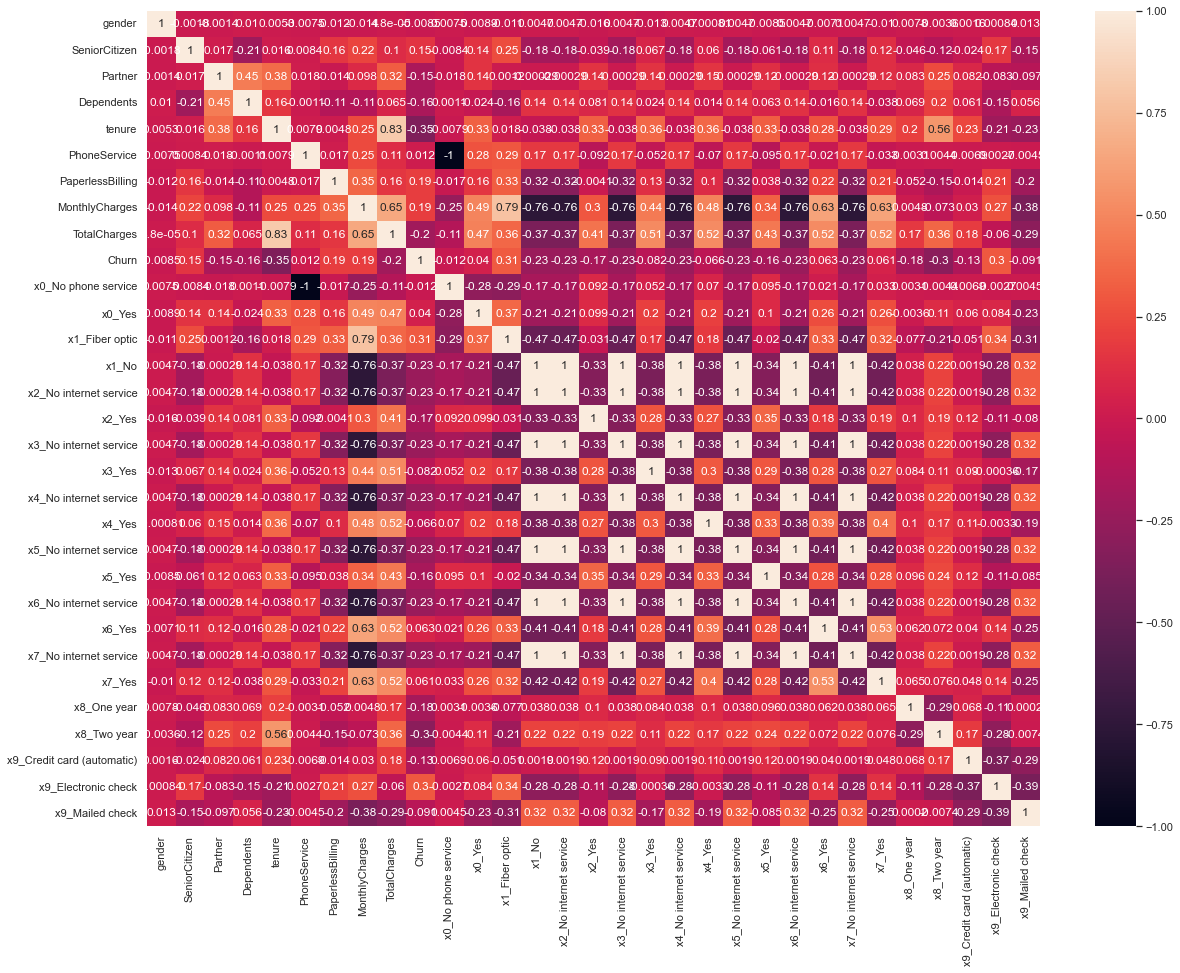

In [63]:
# Visualizing the correlation between the columns
sns.set(rc = {'figure.figsize': (20,15)})
sns.heatmap(EncodedData.corr(),annot = True)


### Spliting the data set into Train and Test

In [64]:
# Defining the target and predict variables
X = EncodedData.drop(columns = ['Churn'])
y = EncodedData['Churn']

In [65]:
# Importing the libraries and splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 27)

In [66]:
# Combining the Train and Test data set.
TrainData = X_train.join(y_train , on = X_train.index)
TestData = X_test.join(y_test , on = X_test.index)
print(('Train Data shape \n'),TrainData.shape)
print(('Test Data shape \n'),TestData.shape)

Train Data shape 
 (5625, 31)
Test Data shape 
 (1407, 31)


In [69]:
len(TrainData) + len(TestData) == len(EncodedData)

True

### Banlancing of data using the SMOTE method

In [70]:
# Veiwing the balance of the data in terms of churned customers
not_churned, churned = TrainData['Churn'].value_counts()
not_churned, churned

(4118, 1507)

In [71]:
#pip install imblearn

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
X = TrainData.drop('Churn', axis = 'columns')
y = TrainData['Churn']

In [74]:
sm = SMOTE(random_state = 20, sampling_strategy = 'all')
X_train_bal, y_train_bal = sm.fit_resample(X, y)

In [75]:
y_train_bal.value_counts()

1    4118
0    4118
Name: Churn, dtype: int64

## TRAINING THE MODELS

### 1. RANDOM FOREST

In [76]:
# Importing the random forest library
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Training the random forest model
random_forest = RandomForestClassifier(n_jobs = -1,
                                       random_state = 42,
                                       max_samples = 8000)
random_forest_model = random_forest.fit(X_train_bal, y_train_bal)

In [78]:
# Making predictions
y_pred = random_forest_model.predict(X_test)

In [79]:
random_forest_model.score(X_train_bal, y_train_bal)

0.9985429820301117

In [80]:
# Visualizing the feature impotance of the random forest model.
random_forest_importance = random_forest_model.feature_importances_
random_forest_importance = pd.DataFrame(random_forest_importance, columns = ['score']). reset_index()
random_forest_importance['feature'] = list(X.columns)
random_forest_importance.drop(columns = ['index'], inplace = True)
random_forest_importance.sort_values(by = 'score', ascending = False, ignore_index = True, inplace = True)

fig = px.bar(random_forest_importance, x = 'feature', y = 'score')
fig.show()

In [81]:
# Evaluating prediction results for Random Forest
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 0.9)

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print(results)
# results = results.append(model_results, ignore_index = True)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest  0.780384   0.566085  0.627072   0.59502  0.591844


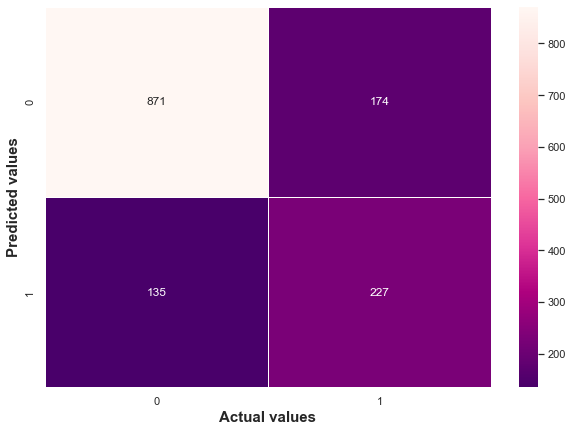

In [82]:
# Visualizing the confusion matrix fot randon forest
randomForest_CM = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(randomForest_CM, annot = True, linewidth = 0.5, fmt = '.0f', cmap = 'RdPu_r', ax = ax)
plt.ylabel('Predicted values', fontweight = 'bold', fontsize = 15)
plt.xlabel('Actual values', fontweight = 'bold', fontsize = 15)
plt.savefig('randomForest_CM.png', dpi = 300)

plt.show()

### 2. LOGISTIC REGRESSION

In [83]:
# Importing the Logistic Regression Model
from sklearn.linear_model import LogisticRegression 

# Training the model
logicReg = LogisticRegression()
logicReg_model = logicReg.fit(X_train_bal, y_train_bal) 

In [84]:
# Making predictions
y_pred = logicReg_model.predict(X_test)

In [85]:
logicReg_model.score(X_train_bal, y_train_bal)

0.7745264691597863

In [86]:
# viewing the Feature importance for Logistic Regression
logicReg_importance = logicReg_model.coef_[0]
logicReg_importance = pd.DataFrame(logicReg_importance, index = X.columns)
logicReg_importance.reset_index(inplace = True)
logicReg_importance.rename(columns = {'index':'Feature', 0:'Score'}, inplace = True)
logicReg_importance.sort_values(by = 'Score', ascending = False, inplace = True)
logicReg_importance

fig = px.bar(logicReg_importance, x = 'Feature', y = 'Score')
fig.show()

In [87]:
# Evaluating prediction results for Logistic Regression
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2.0)

model_results = pd.DataFrame([['Logictic Regression', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0        Random Forest  0.780384   0.566085  0.627072  0.595020  0.591844
1  Logictic Regression  0.761194   0.523810  0.790055  0.629956  0.717151


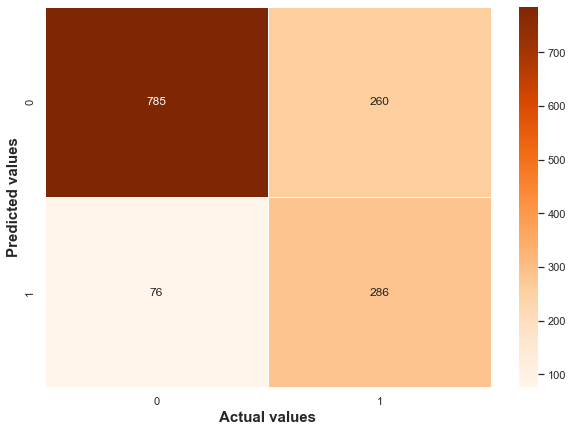

In [88]:
# Visualizing the confusion matrix for logistic Regression
logicReg_CM = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(logicReg_CM, annot = True, linewidth = 0.5, fmt = '.0f', cmap = 'Oranges', ax = ax)
plt.ylabel('Predicted values', fontweight = 'bold', fontsize = 15)
plt.xlabel('Actual values', fontweight = 'bold', fontsize = 15)
plt.savefig('logicReg_CM.png', dpi = 300)

plt.show()

### 3. NAIVE BAYES

In [89]:
from sklearn.naive_bayes import GaussianNB
NaiveB = GaussianNB()
NaiveB_model = NaiveB.fit(X_train_bal, y_train_bal)

In [90]:
# Making predictions with the Naive Bayes model
y_pred = NaiveB_model.predict(X_test)

In [91]:
NaiveB_model.score(X_train_bal, y_train_bal)

0.736765420106848

In [92]:
# Evaluating the results for Naive Bayes 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2.0)

model_results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)


print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0        Random Forest  0.780384   0.566085  0.627072  0.595020  0.591844
1  Logictic Regression  0.761194   0.523810  0.790055  0.629956  0.717151
2          Naive Bayes  0.682303   0.440393  0.867403  0.584186  0.726516


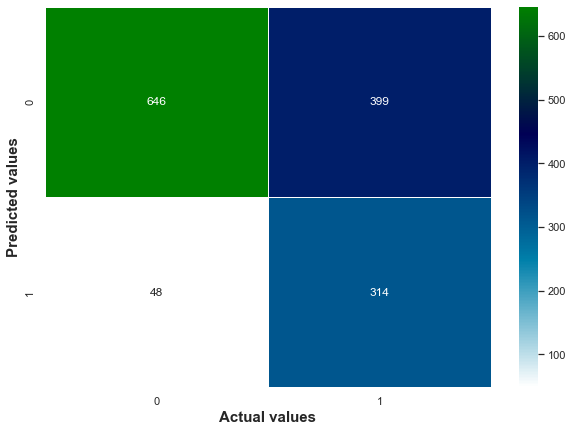

In [93]:
# Visualizing the confusion matrix for logistic Regression
NaiveB_CM = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(NaiveB_CM, annot = True, linewidth = 0.5, fmt = '.0f', cmap = 'ocean_r', ax = ax)
plt.ylabel('Predicted values', fontweight = 'bold', fontsize = 15)
plt.xlabel('Actual values', fontweight = 'bold', fontsize = 15)
plt.savefig('NaiveB_CM.png', dpi = 300)

plt.show()

### 4. CATBOOST

In [94]:
# %pip install catboost
from catboost import CatBoostClassifier

In [95]:
# # X_train_bal.dtypes.tolist()
# X_train_bal['MultipleLines',
#             'InternetService',
#             'OnlineSecurity',
#             'OnlineBackup',
#             'DeviceProtection',
#             'TechSupport',
#             'StreamingTV',
#             'StreamingMovies',
#             'Contract',
#             'PaymentMethod'].astype('int')
# # X_train_bal.columns.astype('int')

In [96]:
# cat_features_names = X.drop(columns = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
#        'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']) # here we specify names of categorical features


# cat_features = [X.columns.get_loc(col) for col in cat_features_names]
# print(cat_features)



In [97]:
# help(CatB_model)

In [98]:
# Specifing the parameters for the model
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200
         }

# Initializing the model
CatB = CatBoostClassifier(**params)

# training the model
CatB_model = CatB.fit(X_train_bal, y_train_bal)

# catboost_model.fit(X_train, y_train, cat_features=categorical_features_indices)

Learning rate set to 0.025348
0:	total: 542ms	remaining: 9m 1s
200:	total: 7.49s	remaining: 29.8s
400:	total: 13.4s	remaining: 20s
600:	total: 18.1s	remaining: 12s
800:	total: 22.9s	remaining: 5.69s
999:	total: 27.5s	remaining: 0us


In [99]:
# Making predictions with the SVC model
y_pred = CatB_model.predict(X_test)

In [100]:
print('R-square score is :', r2_score(y_test, y_pred))

R-square score is : -0.16416241507837892


In [101]:
CatB_importance = CatB_model.feature_importances_
CatB_importance = pd.DataFrame(CatB_importance, columns = ['score']). reset_index()
CatB_importance['feature'] = list(X.columns)
CatB_importance.drop(columns = ['index'], inplace = True)
CatB_importance.sort_values(by = 'score', ascending = False, ignore_index = True, inplace = True)

fig = px.bar(CatB_importance, x = 'feature', y = 'score')
fig.show()

In [102]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2.0)

model_results = pd.DataFrame([['Cat Boost', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0        Random Forest  0.780384   0.566085  0.627072  0.595020  0.591844
1  Logictic Regression  0.761194   0.523810  0.790055  0.629956  0.717151
2          Naive Bayes  0.682303   0.440393  0.867403  0.584186  0.726516
3            Cat Boost  0.777541   0.561097  0.621547  0.589777  0.608437


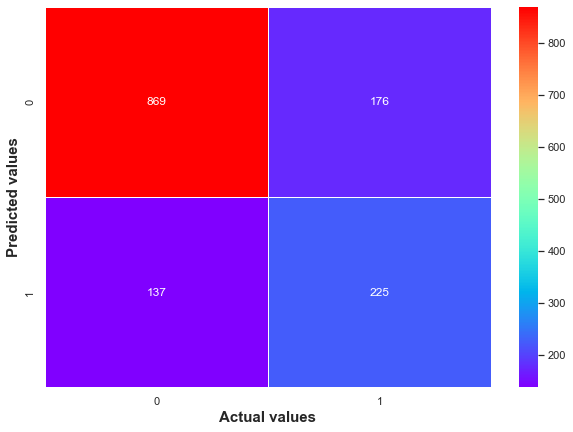

In [103]:
# Visualizing the confusion matrix for logistic Regression
CatB_CM = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(CatB_CM, annot = True, linewidth = 0.5, fmt = '.0f', cmap = 'rainbow', ax = ax)
plt.ylabel('Predicted values', fontweight = 'bold', fontsize = 15)
plt.xlabel('Actual values', fontweight = 'bold', fontsize = 15)
plt.savefig('CatB_CM.png', dpi = 300)

plt.show()

### DECISION TREE

In [104]:
# Impoting the Decision Tree library
from sklearn.tree import DecisionTreeClassifier

# Initializing the model
DT = DecisionTreeClassifier()
# Training the model
DT_model = DT.fit(X_train, y_train)

In [105]:
# Making predictions
y_pred = DT.predict(X_test)

In [106]:
DT_model.score(X_train_bal, y_train_bal)

0.902986886838271

In [107]:
# Evaluating the results of the Decision Tree 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0        Random Forest  0.780384   0.566085  0.627072  0.595020  0.591844
1  Logictic Regression  0.761194   0.523810  0.790055  0.629956  0.717151
2          Naive Bayes  0.682303   0.440393  0.867403  0.584186  0.726516
3            Cat Boost  0.777541   0.561097  0.621547  0.589777  0.608437
4        Decision Tree  0.725657   0.469849  0.516575  0.492105  0.506501


In [108]:
DT_importance = DT_model.feature_importances_
DT_importance = pd.DataFrame(DT_importance, columns = ['score']). reset_index()
DT_importance['feature'] = list(X.columns)
DT_importance.drop(columns = ['index'], inplace = True)
DT_importance.sort_values(by = 'score', ascending = False, ignore_index = True, inplace = True)

fig = px.bar(DT_importance, x = 'feature', y = 'score')
fig.show()

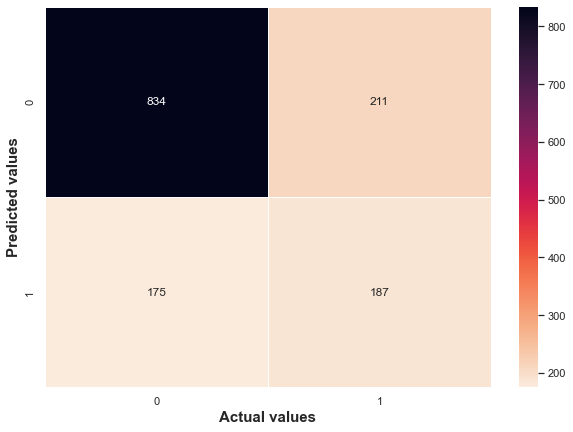

In [109]:
# Visualizing the confusion matrix for Decision Tree
DT_CM = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(DT_CM, annot = True, linewidth = 0.5, fmt = '.0f', cmap = 'rocket_r', ax = ax)
plt.ylabel('Predicted values', fontweight = 'bold', fontsize = 15)
plt.xlabel('Actual values', fontweight = 'bold', fontsize = 15)
plt.savefig('DT_CM.png', dpi = 300)

plt.show()


### GRADIENT BOOSTING

In [110]:
# Importing the library
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the model
GradientB = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 20)

# Training the model
GradientB_model = GradientB.fit(X_train_bal, y_train_bal)

In [111]:
# Making predictions with the model
y_pred = GradientB.predict(X_test)

In [112]:
GradientB_model.score(X_train_bal, y_train_bal)

0.9100291403593977

In [113]:
# Evaluating the results of the Decision Tree 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2.0)

model_results = pd.DataFrame([['Gradient Boost', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0        Random Forest  0.780384   0.566085  0.627072  0.595020  0.591844
1  Logictic Regression  0.761194   0.523810  0.790055  0.629956  0.717151
2          Naive Bayes  0.682303   0.440393  0.867403  0.584186  0.726516
3            Cat Boost  0.777541   0.561097  0.621547  0.589777  0.608437
4        Decision Tree  0.725657   0.469849  0.516575  0.492105  0.506501
5       Gradient Boost  0.768301   0.546154  0.588398  0.566489  0.579434


In [114]:
GradientB_importance = GradientB_model.feature_importances_
GradientB_importance = pd.DataFrame(GradientB_importance, columns = ['score']). reset_index()
GradientB_importance['feature'] = list(X.columns)
GradientB_importance.drop(columns = ['index'], inplace = True)
GradientB_importance.sort_values(by = 'score', ascending = False, ignore_index = True, inplace = True)

fig = px.bar(GradientB_importance, x = 'feature', y = 'score')
fig.show()

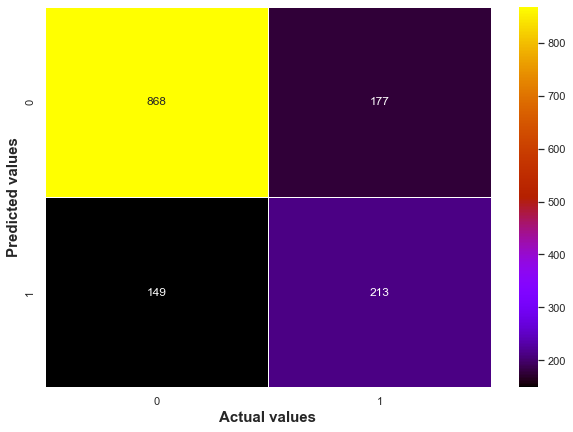

In [115]:
# Visualizing the confusion matrix for Gradient Boost
GradientB_CM = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(GradientB_CM, annot = True, linewidth = 0.5, fmt = '.0f', cmap = 'gnuplot', ax = ax)
plt.ylabel('Predicted values', fontweight = 'bold', fontsize = 15)
plt.xlabel('Actual values', fontweight = 'bold', fontsize = 15)
plt.savefig('GradientB_CM.png', dpi = 300)
plt.show()

## Performing Hyperparameter tuning with RandomSearch CV on the Random forest model.
Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model’s performance, minimizing a predefined loss function to produce better results with fewer errors. 

There are several ways to achieve hyperparameter tuning, the method that will be used here is the Random Search CV.

In [117]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators': [90,100,115,130],
           'criterion': ['gini', 'entropy'],
           'max_depth': range(2,20,1),
           'min_samples_split': range(2,10,1),
           'min_samples_leaf': range(2,10,1),
           'max_features': ['auto', 'log2']
}


# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1,
                                                     random_state = 42),
                              param_distributions = rf_grid,
                              n_iter = 5,
                              cv = 10,
                              verbose = True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train_bal, y_train_bal)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
CPU times: total: 40.8 s
Wall time: 1min 47s


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=True)

In [118]:
# Finding the best model hyperparameters
rs_model.best_params_

{'n_estimators': 115,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': 18,
 'criterion': 'gini'}

In [119]:
# Most ideal hyperparameters
rf_ideal_model = RandomForestClassifier(n_estimators = 115,
                                     criterion = 'gini',
                                     max_depth = 18,
                                     min_samples_split = 2,
                                     min_samples_leaf = 9,
                                     max_features = 'auto',
                                     random_state = 42)

# Fit the model
rf_ideal_model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_depth=18, max_features='auto', min_samples_leaf=9,
                       n_estimators=115, random_state=42)

In [120]:
y_pred = rf_ideal_model.predict(X_test)

In [121]:
rf_ideal_model.score(X_train_bal, y_train_bal)

0.8583050024283633

In [122]:
# Evaluating the results of the Decision Tree 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2.0)

model_results = pd.DataFrame([['Random Forest (HP)', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0        Random Forest  0.780384   0.566085  0.627072  0.595020  0.591844
1  Logictic Regression  0.761194   0.523810  0.790055  0.629956  0.717151
2          Naive Bayes  0.682303   0.440393  0.867403  0.584186  0.726516
3            Cat Boost  0.777541   0.561097  0.621547  0.589777  0.608437
4        Decision Tree  0.725657   0.469849  0.516575  0.492105  0.506501
5       Gradient Boost  0.768301   0.546154  0.588398  0.566489  0.579434
6   Random Forest (HP)  0.768301   0.537815  0.707182  0.610979  0.665281


#### Comment
From the results , it can be seen that the model with the ideal hyperparameters performed slightly better than the first trained Random forest model. The Accuracy, Recall, F1 and F2 scores improved, with the exception of the precision score.

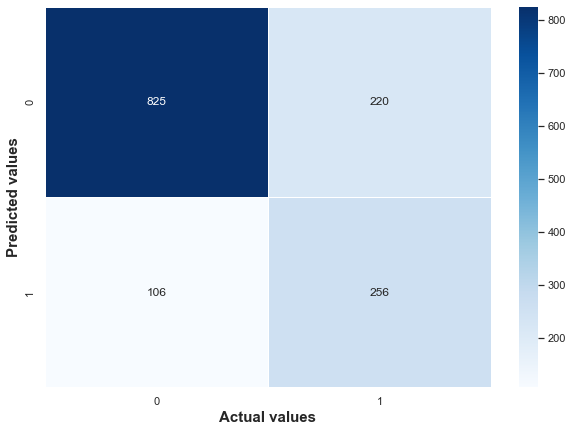

In [123]:
# Visualizing the confusion matrix for Random Forest Hyperparameter tuning
rfideal_CM = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(rfideal_CM, annot = True, linewidth = 0.5, fmt = '.0f', cmap = 'Blues', ax = ax)
plt.ylabel('Predicted values', fontweight = 'bold', fontsize = 15)
plt.xlabel('Actual values', fontweight = 'bold', fontsize = 15)
plt.savefig('rfideal_CM.png', dpi = 300)

plt.show()

## Performing Hyperparameter tuning with GridSearchCV on the CatBoost model.
Grid search is a sort of “brute force” hyperparameter tuning method. We create a grid of possible discrete hyperparameter values then fit the model with every possible combination. We record the model performance for each set then select the combination that has produced the best performance.

In [124]:
# Importing the GridCV library
from sklearn.model_selection import GridSearchCV

In [125]:
%%time

# Initializing the model
CBC = CatBoostClassifier()

# Defining the parameters
CBparam = {'depth'         : [4,5,6,7,8,9, 10],
           'learning_rate' : [0.01,0.02,0.03,0.04],
           'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
            }
# Making an object grid_GBC for GridSearchCV and fitting the dataset i.e X and y
Grid_CBC = GridSearchCV(estimator = CBC, 
                        param_grid = CBparam, 
                        cv = 5,
#                         n_iter = 10,
                        n_jobs=-1)

Grid_CBC.fit(X_train_bal, y_train_bal)

# printing out the results
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

0:	learn: 0.6669132	total: 148ms	remaining: 14.7s
1:	learn: 0.6430959	total: 298ms	remaining: 14.6s
2:	learn: 0.6217132	total: 487ms	remaining: 15.7s
3:	learn: 0.6032517	total: 694ms	remaining: 16.7s
4:	learn: 0.5850930	total: 907ms	remaining: 17.2s
5:	learn: 0.5703086	total: 1.08s	remaining: 16.9s
6:	learn: 0.5565494	total: 1.32s	remaining: 17.5s
7:	learn: 0.5445222	total: 1.47s	remaining: 16.9s
8:	learn: 0.5334486	total: 1.65s	remaining: 16.7s
9:	learn: 0.5220526	total: 1.82s	remaining: 16.4s
10:	learn: 0.5123480	total: 2.01s	remaining: 16.3s
11:	learn: 0.5031471	total: 2.17s	remaining: 15.9s
12:	learn: 0.4952208	total: 2.35s	remaining: 15.8s
13:	learn: 0.4886810	total: 2.52s	remaining: 15.5s
14:	learn: 0.4817390	total: 2.72s	remaining: 15.4s
15:	learn: 0.4750103	total: 2.87s	remaining: 15.1s
16:	learn: 0.4688750	total: 3.04s	remaining: 14.8s
17:	learn: 0.4631851	total: 3.23s	remaining: 14.7s
18:	learn: 0.4564950	total: 3.37s	remaining: 14.4s
19:	learn: 0.4517295	total: 3.54s	remaini

In [126]:
# Most ideal parameters for catboost model
cb_ideal_model = CatBoostClassifier(depth = 10,
                                   iterations = 100,
                                   learning_rate = 0.04)

# Fitting  the model
cb_ideal_model.fit(X_train_bal, y_train_bal)

0:	learn: 0.6669132	total: 186ms	remaining: 18.4s
1:	learn: 0.6430959	total: 349ms	remaining: 17.1s
2:	learn: 0.6217132	total: 541ms	remaining: 17.5s
3:	learn: 0.6032517	total: 771ms	remaining: 18.5s
4:	learn: 0.5850930	total: 965ms	remaining: 18.3s
5:	learn: 0.5703086	total: 1.15s	remaining: 18s
6:	learn: 0.5565494	total: 1.29s	remaining: 17.1s
7:	learn: 0.5445222	total: 1.45s	remaining: 16.7s
8:	learn: 0.5334486	total: 1.62s	remaining: 16.3s
9:	learn: 0.5220526	total: 1.8s	remaining: 16.2s
10:	learn: 0.5123480	total: 2s	remaining: 16.2s
11:	learn: 0.5031471	total: 2.23s	remaining: 16.4s
12:	learn: 0.4952208	total: 2.41s	remaining: 16.1s
13:	learn: 0.4886810	total: 2.58s	remaining: 15.9s
14:	learn: 0.4817390	total: 2.74s	remaining: 15.5s
15:	learn: 0.4750103	total: 2.93s	remaining: 15.4s
16:	learn: 0.4688750	total: 3.1s	remaining: 15.2s
17:	learn: 0.4631851	total: 3.32s	remaining: 15.1s
18:	learn: 0.4564950	total: 3.49s	remaining: 14.9s
19:	learn: 0.4517295	total: 3.67s	remaining: 14.

In [127]:
# Making predictions with ideal catboost model
y_pred = cb_ideal_model.predict(X_test)

In [128]:
cb_ideal_model.score(X_train_bal, y_train_bal)

0.8754249635745508

In [129]:
# Evaluating the results of the Catboost hyper tuning 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2.0)

model_results = pd.DataFrame([['Cat Boost (HP)', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0        Random Forest  0.780384   0.566085  0.627072  0.595020  0.591844
1  Logictic Regression  0.761194   0.523810  0.790055  0.629956  0.717151
2          Naive Bayes  0.682303   0.440393  0.867403  0.584186  0.726516
3            Cat Boost  0.777541   0.561097  0.621547  0.589777  0.608437
4        Decision Tree  0.725657   0.469849  0.516575  0.492105  0.506501
5       Gradient Boost  0.768301   0.546154  0.588398  0.566489  0.579434
6   Random Forest (HP)  0.768301   0.537815  0.707182  0.610979  0.665281
7       Cat Boost (HP)  0.768301   0.540000  0.671271  0.598522  0.640148


#### Comment
From the results , it can be seen that the model with the ideal hyperparameters performed slightly better than the first trained Random forest model. The Accuracy, Recall, F1 and F2 scores improved, with the exception of the precision score.

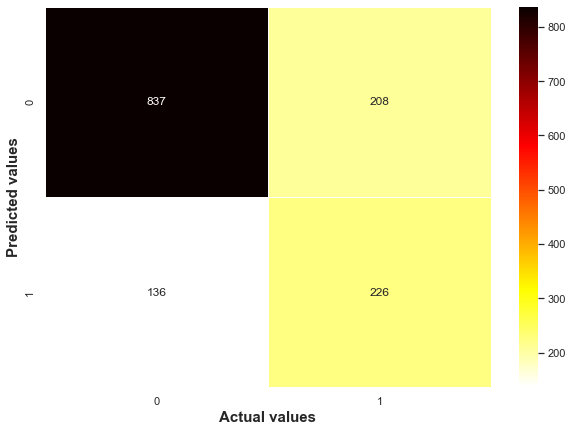

In [140]:
# Visualizing the confusion matrix for Random Forest Hyperparameter tuning
cbideal_CM = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(cbideal_CM, annot = True, linewidth = 0.5, fmt = '.0f', cmap = 'hot_r', ax = ax)
plt.ylabel('Predicted values', fontweight = 'bold', fontsize = 15)
plt.xlabel('Actual values', fontweight = 'bold', fontsize = 15)
plt.savefig('cbideal_CM.png', dpi = 300)

plt.show()

## Performing Hyperparameter tuning with GridSearchCV on the Decision Tree model.

In [133]:
%%time
from scipy.stats import randint
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
 
tree_cv.fit(X_train_bal, y_train_bal)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 6}
Best score is 0.7832732063593117
CPU times: total: 1.72 s
Wall time: 4.87 s


In [134]:
# Most ideal parameters for Logistic Regression model
DT_ideal_model = DecisionTreeClassifier( criterion = 'entropy',
                                         max_depth = None,
                                         min_samples_leaf = 6,
                                         max_features = 6,
                                         random_state = 42)
                                    

# Fitting  the model
DT_ideal_model.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', max_features=6, min_samples_leaf=6,
                       random_state=42)

In [135]:
# Making predictions with ideal Decision Tree model
y_pred = DT_ideal_model.predict(X_test)

In [136]:
DT_ideal_model.score(X_train_bal, y_train_bal)

0.8553909664885867

In [137]:
# Evaluating the results of the Decision Tree hyper tuning 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta = 2.0)

model_results = pd.DataFrame([['Decision Tree (HP)', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0        Random Forest  0.780384   0.566085  0.627072  0.595020  0.591844
1  Logictic Regression  0.761194   0.523810  0.790055  0.629956  0.717151
2          Naive Bayes  0.682303   0.440393  0.867403  0.584186  0.726516
3            Cat Boost  0.777541   0.561097  0.621547  0.589777  0.608437
4        Decision Tree  0.725657   0.469849  0.516575  0.492105  0.506501
5       Gradient Boost  0.768301   0.546154  0.588398  0.566489  0.579434
6   Random Forest (HP)  0.768301   0.537815  0.707182  0.610979  0.665281
7       Cat Boost (HP)  0.768301   0.540000  0.671271  0.598522  0.640148
8   Decision Tree (HP)  0.755508   0.520737  0.624309  0.567839  0.600425


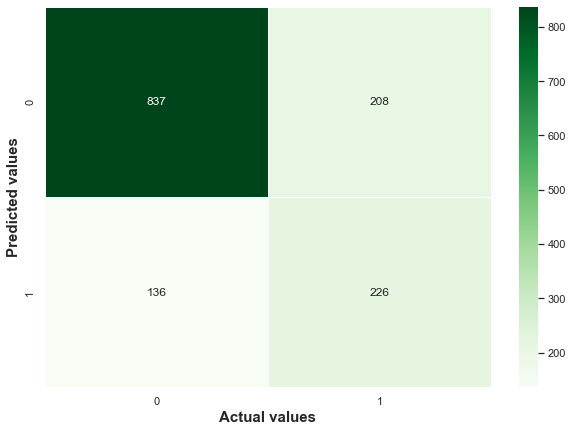

In [139]:
# Visualizing the confusion matrix for Random Forest Hyperparameter tuning
DT_CM = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(DT_CM, annot = True, linewidth = 0.5, fmt = '.0f', cmap = 'Greens', ax = ax)
plt.ylabel('Predicted values', fontweight = 'bold', fontsize = 15)
plt.xlabel('Actual values', fontweight = 'bold', fontsize = 15)
plt.savefig('DT(HP)_CM.png', dpi = 300)

plt.show()

## CONCLUSION

From all the models that was trained, the random forest model, compared to the other models had the best score in terms of accuracy. It had a prediction accuracy of 78%. Naive Bayes didnt have a good accracy score but had a very good recall score of 86%. All other models had similar scores that had accuracy scores within 75 - 77% , recall score within 50 - 85%, Precision score within 45 - 60% , F1 score within 50 - 65% and F2 score within 50 - 70%. 
